In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
def get_values_from_log(my_file, testing=None):
    with open(my_file, "r") as f:
        log_file = f.readlines()

    episodes = []
    reward = []
    units = []
    length = []
    collisions = []
    goal = []
    not_completed = []

    if testing:
        for i in range(1, len(log_file)):
            line = log_file[i].splitlines()
            line = line[0].split()
            units.append(i)
            episodes.append(line[0])
            reward.append(float(line[3]))
            collisions.append(int(float(line[4])))
            goal.append(int(float(line[5])))
            not_completed.append(int(float(line[6])))
            length.append(float(line[7]))
            
        return episodes, reward, collisions, goal, not_completed, length, units
    else:
        for i in range(1, len(log_file)):
            line = log_file[i].splitlines()
            line = line[0].split()
            units.append(i)
            episodes.append(line[0])
            reward.append(float(line[3]))
            length.append(float(line[4]))
    
        return episodes, reward, units, length

In [3]:
my_files = [
    {
        "file": "file_1_agent",
        "file_name": "../checkpoints_agents/agent_1/2025-01-31T17-26-59/log"
    },
    {
        "file": "file_2_agents_1",
        "file_name": "../checkpoints_agents/agent_1/2025-02-01T00-31-32/log"
    },
    {
        "file": "file_2_agents_2",
        "file_name": "../checkpoints_agents/agent_2/2025-02-01T00-31-31/log"
    },
    {
        "file": "file_3_agents_1",
        "file_name": "../checkpoints_agents/agent_1/2025-02-02T02-41-42/log"
    },
    {
        "file": "file_3_agents_2",
        "file_name": "../checkpoints_agents/agent_2/2025-02-02T02-41-40/log"
    },
    {
        "file": "file_3_agents_3",
        "file_name": "../checkpoints_agents/agent_3/2025-02-02T02-41-41/log"
    }
]

df = pd.DataFrame()
for file in my_files:
    episodes, reward, units, length = get_values_from_log(file["file_name"])
    my_df = pd.DataFrame(zip(reward, length), columns=["reward", "length"])
    my_df["file"] = file["file"]
    df = pd.concat([df, my_df], ignore_index=True)

column = "reward"
df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

In [4]:
display(df)

,reward,length,file
0,0.158025,36.000,file_1_agent
1,0.395432,53.238,file_1_agent
2,0.409753,73.585,file_1_agent
3,0.418519,77.410,file_1_agent
4,0.456914,79.086,file_1_agent
...,...,...,...
235,0.496543,68.110,file_3_agents_3
236,0.398889,68.470,file_3_agents_3
237,0.347037,72.440,file_3_agents_3
238,0.391235,81.110,file_3_agents_3


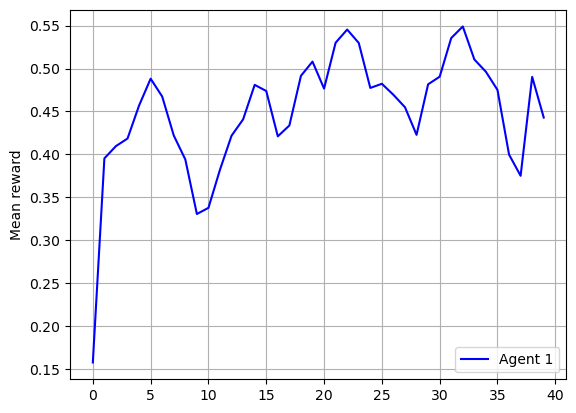

In [26]:
# AGENTE 1 ENTRENANDO SOLO

file = "file_1_agent"
frame = df[df["file"] == file]
reward = np.array(frame["reward"])

i = 0
units = []
for j in range(len(frame)):
    units.append(j)
units = np.array(units)

fig, ax = plt.subplots()
ax.plot(units, reward, color='blue')
ax.set(xlabel='', ylabel='Mean reward')
ax.grid()
plt.legend(['Agent 1'], loc='lower right')

fig.savefig('reward_train_1_agent.png')

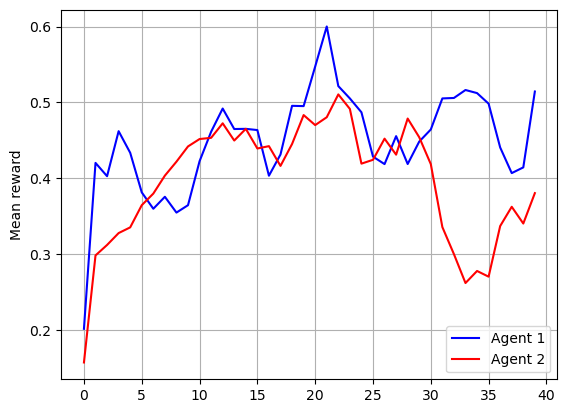

In [27]:
# AGENTES 1 Y 2

file_1 = "file_2_agents_1"
frame_1 = df[df["file"] == file_1]
reward_1 = np.array(frame_1["reward"])

file_2 = "file_2_agents_2"
frame_2 = df[df["file"] == file_2]
reward_2 = np.array(frame_2["reward"])

i = 0
units = []
for j in range(len(frame_1)):
    units.append(j)
units = np.array(units)



fig, ax = plt.subplots()
ax.plot(units, reward_1, color='blue')
ax.plot(units, reward_2, color='red')
ax.set(xlabel='', ylabel='Mean reward')
ax.grid()
plt.legend(['Agent 1', 'Agent 2'], loc='lower right')
fig.savefig('reward_train_2_agents.png')

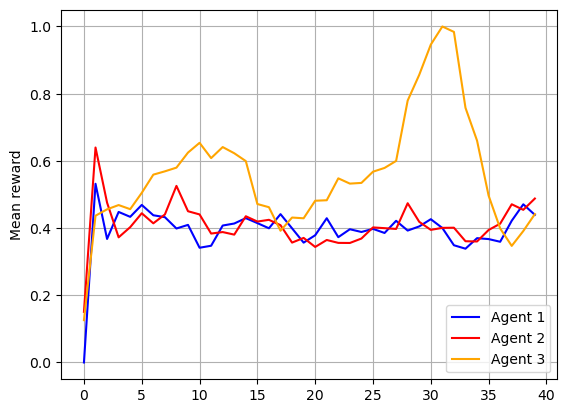

In [37]:
# AGENTES 1, 2 Y 3

file_3 = "file_3_agents_1"
frame_3 = df[df["file"] == file_3]
reward_3 = np.array(frame_3["reward"])

file_4 = "file_3_agents_2"
frame_4 = df[df["file"] == file_4]
reward_4 = np.array(frame_4["reward"])

file_5 = "file_3_agents_3"
frame_5 = df[df["file"] == file_5]
reward_5 = np.array(frame_5["reward"])

i = 0
units = []
for j in range(len(frame_3)):
    units.append(j)
units = np.array(units)

fig, ax = plt.subplots()
ax.plot(units, reward_3, color='blue')
ax.plot(units, reward_4, color='red')
ax.plot(units, reward_5, color='orange')
ax.set(xlabel='', ylabel='Mean reward')
ax.grid()
plt.legend(['Agent 1', 'Agent 2', 'Agent 3'], loc='lower right')
fig.savefig('reward_train_3_agents.png')

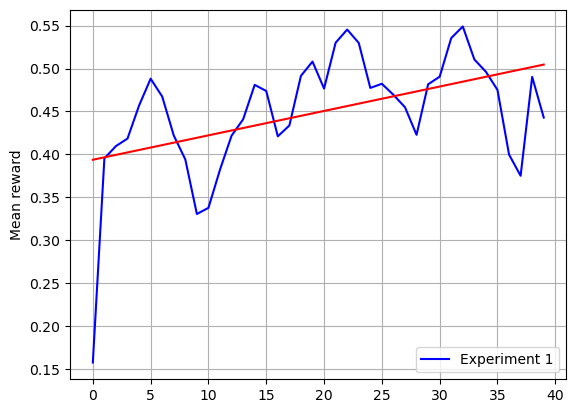

In [43]:
reward_experiment_1 = reward
reward_experiment_2 = (reward_1 + reward_2) / 2
reward_experiment_3 = (reward_3 + reward_4 + reward_5) / 3

i = 0
units = []
for j in range(len(frame_3)):
    units.append(j)
units = np.array(units)

# Calculate and plot the trendline
fig, ax = plt.subplots()
ax.plot(units, reward_experiment_1, color='blue')
z = np.polyfit(units, reward_experiment_1, 1)
p = np.poly1d(z)
ax.plot(units, p(units), label='Trendline', color='red')
# ax.plot(units, reward_experiment_2, color='red')
# ax.plot(units, reward_experiment_3, color='orange')
ax.set(xlabel='', ylabel='Mean reward')
ax.grid()
plt.legend(['Experiment 1'], loc='lower right')
# fig.savefig('reward_train_experiments.png')

plt.show()

In [9]:
# TEST

my_files_2 = [
    {
        "file": "file_1_agent",
        "file_name": "../checkpoints_agents_test/agent_1/2025-02-02T02-03-28/log",
        "test": 1
    },
    {
        "file": "file_2_agents_1",
        "file_name": "../checkpoints_agents_test/agent_1/2025-02-02T02-06-41/log",
        "test": 2
    },
    {
        "file": "file_2_agents_2",
        "file_name": "../checkpoints_agents_test/agent_2/2025-02-02T02-19-20/log",
        "test": 2
    },
    {
        "file": "file_3_agents_1",
        "file_name": "../checkpoints_agents_test/agent_1/2025-02-02T10-48-40/log",
        "test": 3
    },
    {
        "file": "file_3_agents_2",
        "file_name": "../checkpoints_agents_test/agent_2/2025-02-02T10-57-39/log",
        "test": 3
    },
    {
        "file": "file_3_agents_3",
        "file_name": "../checkpoints_agents_test/agent_3/2025-02-02T11-05-19/log",
        "test": 3
    }
]

df_2 = pd.DataFrame()
for file in my_files_2:
    episodes, reward, collisions, goal, not_completed, length, units = get_values_from_log(file["file_name"], testing=True)
    my_df = pd.DataFrame(zip(reward, collisions, goal, not_completed, length), columns=["reward", "collisions", "goal", "not_completed", "length"])
    my_df["file"] = file["file"]
    my_df["test"] = file["test"]
    df_2 = pd.concat([df_2, my_df], ignore_index=True)

column = "reward"
df_2[column] = (df_2[column] - df_2[column].min()) / (df_2[column].max() - df_2[column].min())

In [10]:
df_2

,reward,collisions,goal,not_completed,length,file,test
0,1.000000,0,1,0,1.000,file_1_agent,1
1,0.389031,15,5,0,28.476,file_1_agent,1
2,0.376183,15,5,0,26.415,file_1_agent,1
3,0.355372,16,4,0,29.508,file_1_agent,1
4,0.367393,14,6,0,28.148,file_1_agent,1
5,0.359955,15,5,0,27.900,file_1_agent,1
6,0.157776,1,0,0,22.000,file_2_agents_1,2
7,0.290458,16,4,0,54.952,file_2_agents_1,2
8,0.366341,12,8,0,66.317,file_2_agents_1,2
9,0.374906,14,6,0,57.639,file_2_agents_1,2


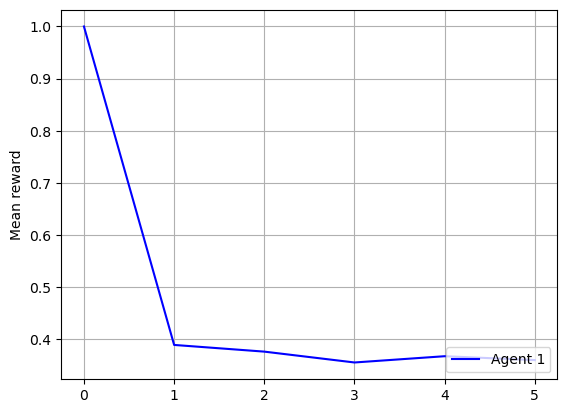

In [11]:
# AGENTE 1 ENTRENANDO SOLO

file = "file_1_agent"
frame = df_2[df_2["file"] == file]
reward = np.array(frame["reward"])

i = 0
units = []
for j in range(len(frame)):
    units.append(j)
units = np.array(units)

fig, ax = plt.subplots()
ax.plot(units, reward, color='blue')
ax.set(xlabel='', ylabel='Mean reward')
ax.grid()
plt.legend(['Agent 1'], loc='lower right')

fig.savefig('reward_test_1_agent.png')

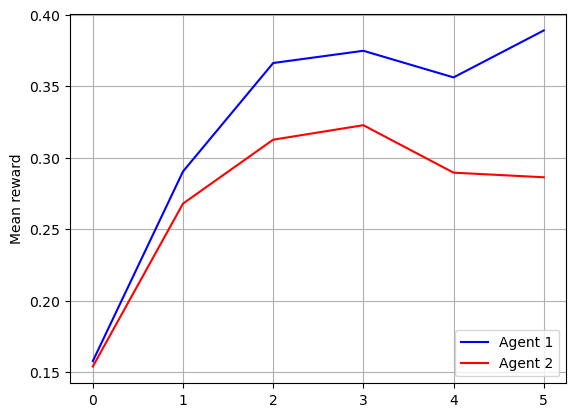

In [12]:
# AGENTES 1 Y 2

file_1 = "file_2_agents_1"
frame_1 = df_2[df_2["file"] == file_1]
reward_1 = np.array(frame_1["reward"])

file_2 = "file_2_agents_2"
frame_2 = df_2[df_2["file"] == file_2]
reward_2 = np.array(frame_2["reward"])

i = 0
units = []
for j in range(len(frame_1)):
    units.append(j)
units = np.array(units)



fig, ax = plt.subplots()
ax.plot(units, reward_1, color='blue')
ax.plot(units, reward_2, color='red')
ax.set(xlabel='', ylabel='Mean reward')
ax.grid()
plt.legend(['Agent 1', 'Agent 2'], loc='lower right')
fig.savefig('reward_test_2_agents.png')

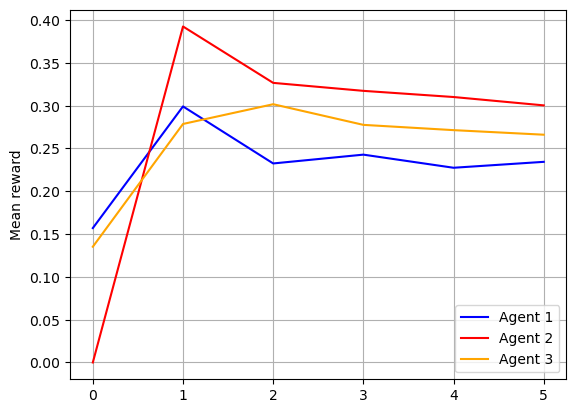

In [13]:
# AGENTES 1, 2 Y 3

file_3 = "file_3_agents_1"
frame_3 = df_2[df_2["file"] == file_3]
reward_3 = np.array(frame_3["reward"])

file_4 = "file_3_agents_2"
frame_4 = df_2[df_2["file"] == file_4]
reward_4 = np.array(frame_4["reward"])

file_5 = "file_3_agents_3"
frame_5 = df_2[df_2["file"] == file_5]
reward_5 = np.array(frame_5["reward"])

i = 0
units = []
for j in range(len(frame_3)):
    units.append(j)
units = np.array(units)

fig, ax = plt.subplots()
ax.plot(units, reward_3, color='blue')
ax.plot(units, reward_4, color='red')
ax.plot(units, reward_5, color='orange')
ax.set(xlabel='', ylabel='Mean reward')
ax.grid()
plt.legend(['Agent 1', 'Agent 2', 'Agent 3'], loc='lower right')
fig.savefig('reward_test_3_agents.png')

In [14]:
federated_scores = []

# Test with 2 agents

test_1 = df_2[df_2["test"] == 1]
classical_scores = np.array(test_1["reward"])

file_1 = "file_2_agents_1"
frame_1 = df_2[df_2["file"] == file_1]

file_2 = "file_2_agents_2"
frame_2 = df_2[df_2["file"] == file_2]

federated_scores.append(np.array([
    frame_1["reward"],
    frame_2["reward"]
]))

# Test with 3 agents

file_3 = "file_3_agents_1"
frame_3 = df_2[df_2["file"] == file_3]

file_4 = "file_3_agents_2"
frame_4 = df_2[df_2["file"] == file_4]

file_5 = "file_3_agents_3"
frame_5 = df_2[df_2["file"] == file_5]

federated_scores.append(np.array([
    frame_3["reward"],
    frame_4["reward"],
    frame_5["reward"]
]))

# Display results
for i in range(len(federated_scores)):
    print(f"EXPERIMENT: {i+1}")
    # Calculate Euclidean distances
    distances = np.linalg.norm(federated_scores[i] - classical_scores, axis=1)
    for i, distance in enumerate(distances):
        print(f"Euclidean distance for Agent {i+1}: {distance}")
    print("\n")

EXPERIMENT: 1
Euclidean distance for Agent 1: 0.8488283099744058
Euclidean distance for Agent 2: 0.8642213871051934


EXPERIMENT: 2
Euclidean distance for Agent 1: 0.8873083431393922
Euclidean distance for Agent 2: 1.0053538687445678
Euclidean distance for Agent 3: 0.8885932536191895




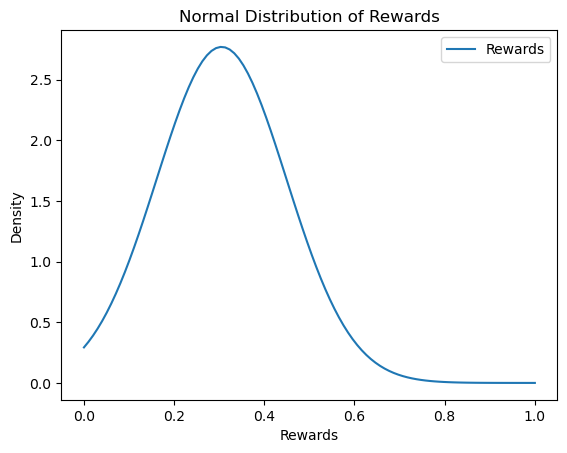

In [15]:
rewards = df_2["reward"]

mean_rewards = np.mean(rewards)
std_rewards = np.std(rewards)

# Create a range of values for the x-axis
x = np.linspace(rewards.min(), rewards.max(), 100)

# Plot the normal distributions
plt.plot(x, norm.pdf(x, mean_rewards, std_rewards), label='Rewards')

# Add labels and legend
plt.xlabel('Rewards')
plt.ylabel('Density')
plt.title('Normal Distribution of Rewards')
plt.legend()

# Show the plot
plt.show()

In [5]:
nums = np.random.randint(10, size=100)

print(nums)

print(np.round(np.mean(nums[-100:]), 3))

[3 6 3 4 4 0 9 2 0 8 7 0 9 0 1 7 5 0 1 5 8 2 3 0 8 3 2 2 6 1 9 8 7 3 7 0 5
 1 5 4 9 7 5 1 9 6 8 4 1 3 4 4 4 7 0 5 4 6 9 5 4 4 9 6 0 1 0 7 4 8 6 5 8 4
 6 1 9 5 1 0 6 3 8 4 2 6 5 9 1 1 4 9 8 9 6 2 8 2 8 5]
4.53
